In [62]:
import torch

In [63]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [64]:
def model(t_u, w, b):
    return w * t_u + b

In [65]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    
    return squared_diffs.mean()

In [66]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)

In [67]:
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [68]:
loss = loss_fn(t_p, t_c)

In [69]:
loss

tensor(1763.8848)

In [70]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [71]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [72]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b + delta), t_c)) / (2.0 * delta)

In [73]:
b = b - learning_rate * loss_rate_of_change_b

In [74]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [75]:
def dmodel_dw(t_u, w, b):
    return t_u

In [76]:
def dmodel_db(t_u, w, b):
    return 1.0

In [77]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)

    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [78]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [79]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_u,
    t_c = t_c
)

tensor([nan, nan], requires_grad=True)

In [80]:
t_un = 0.1 * t_u

In [81]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
from matplotlib import pyplot as plt

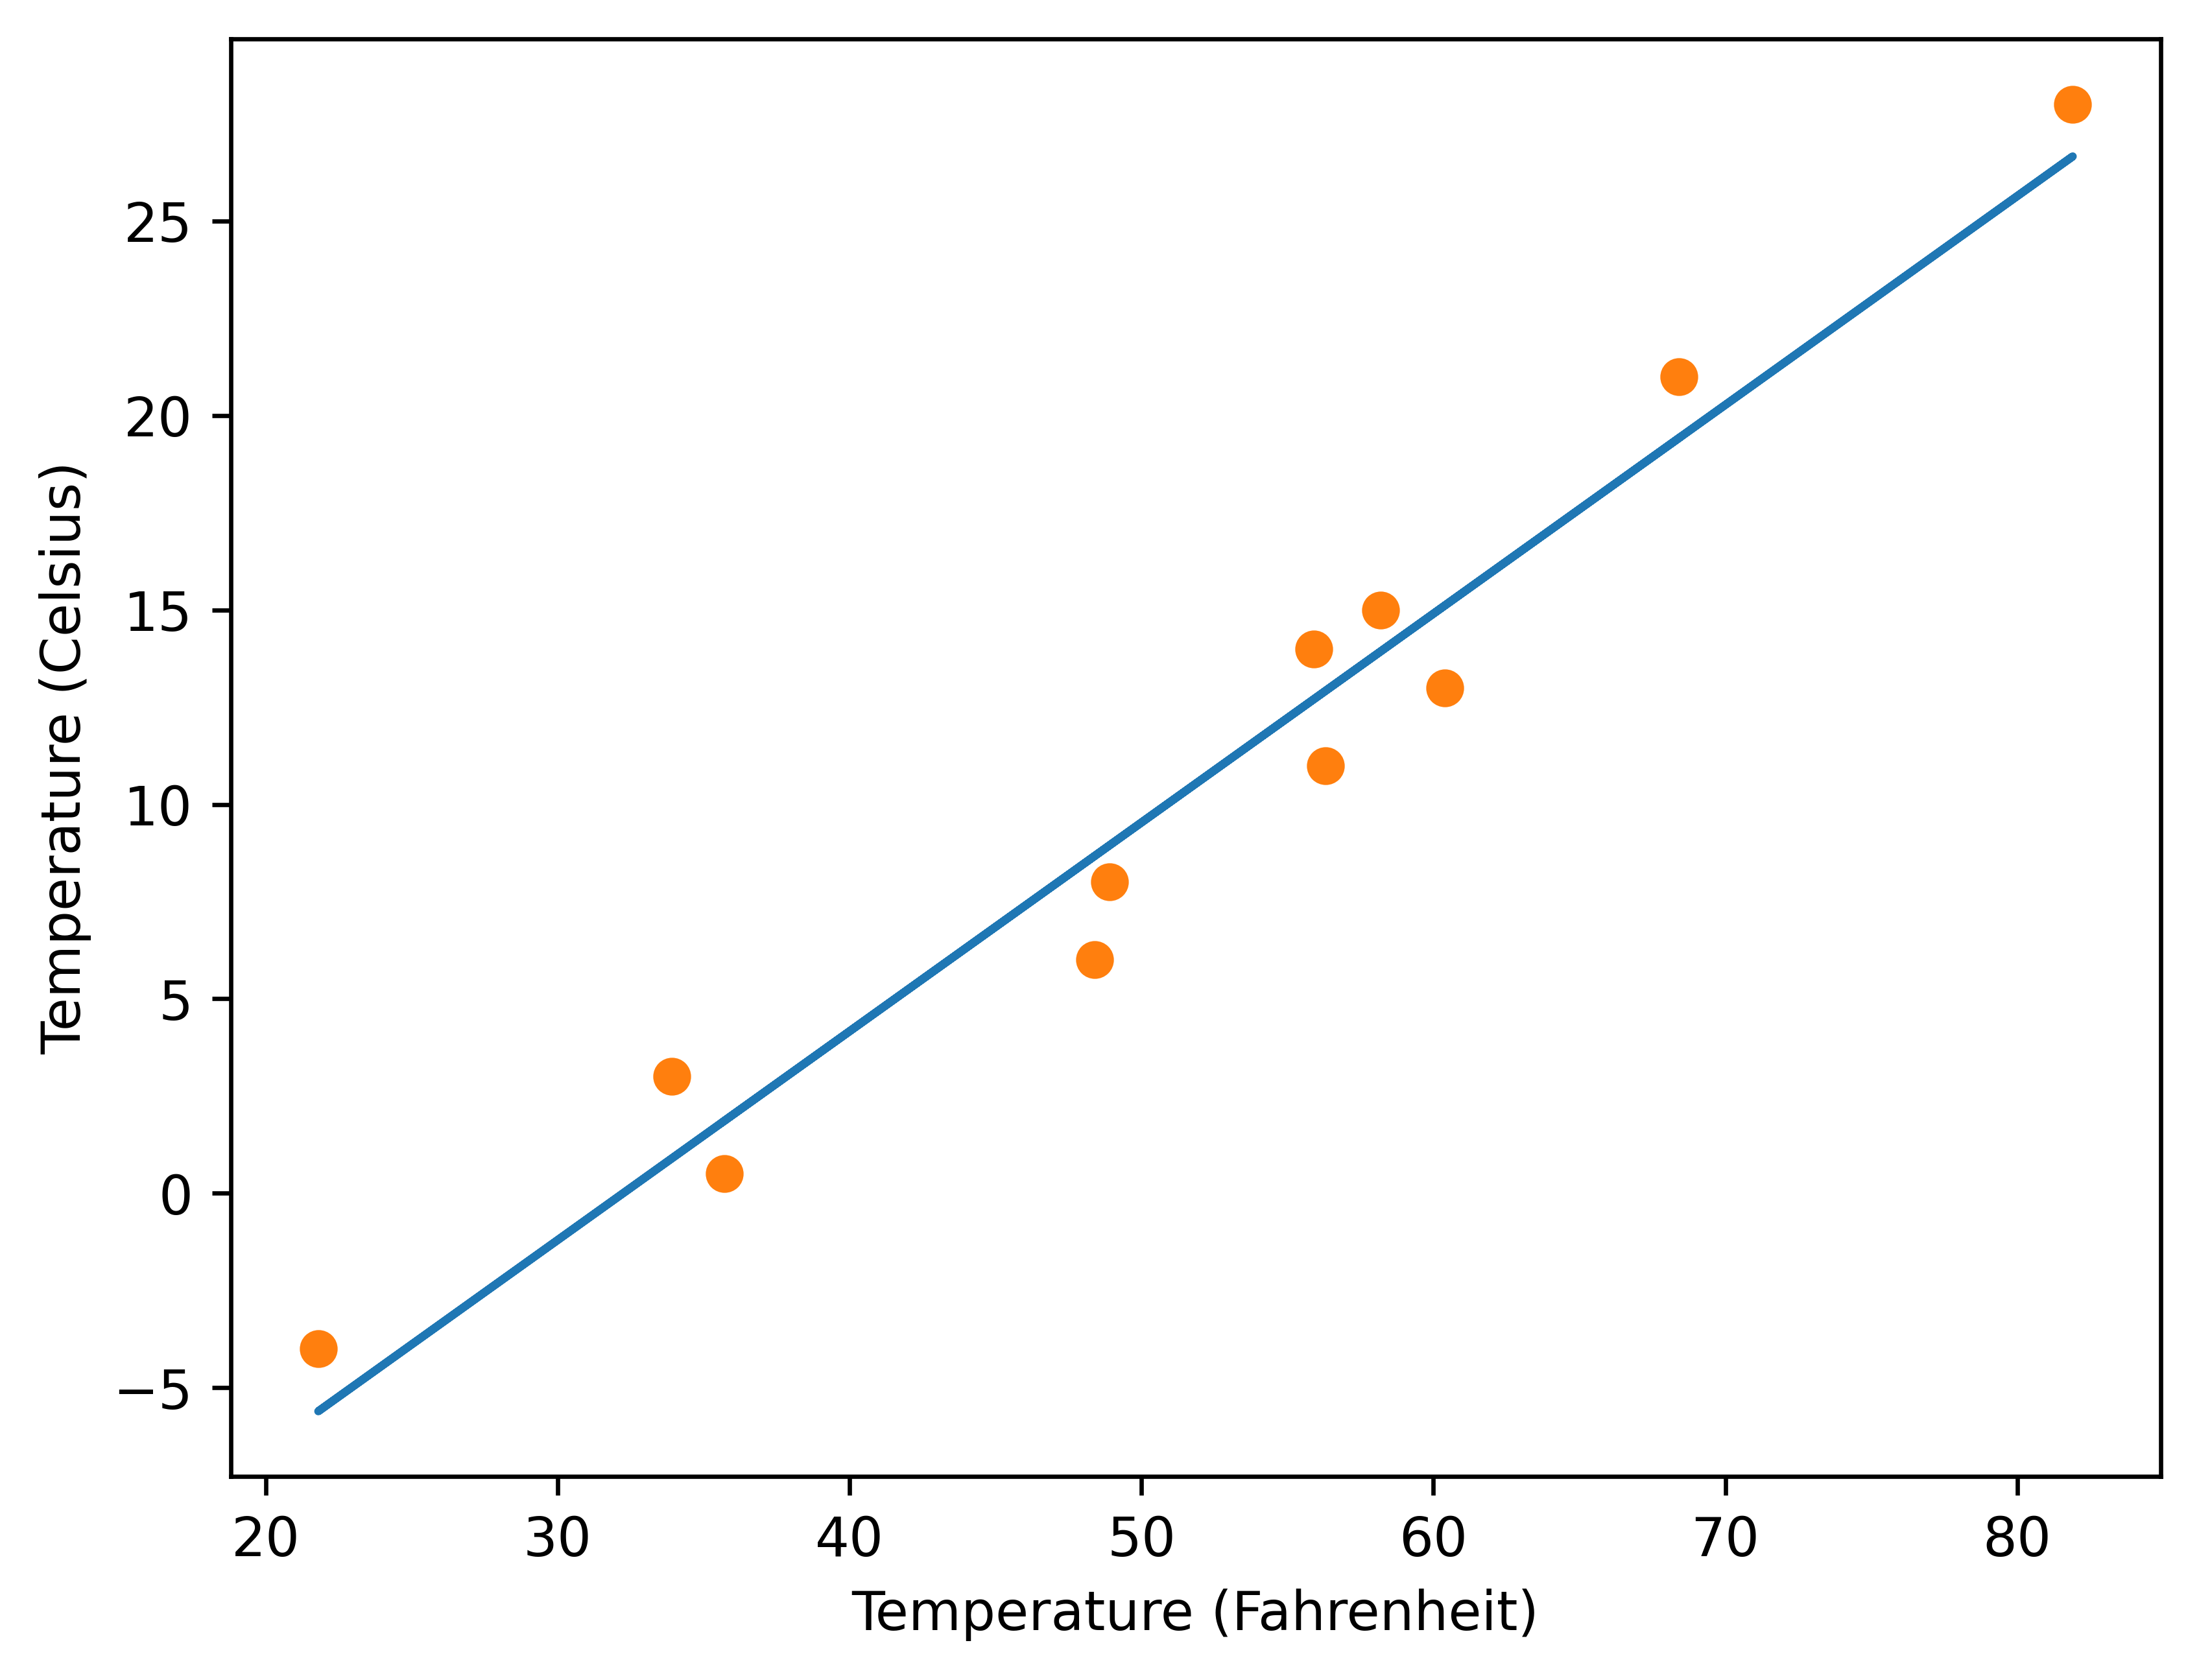

In [ ]:
t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')